# Use of the Integrated van't Hoff Equation to Treat Two-State Protein Denaturation
## A Derivation
David M. Morgan, Ph.D.<br>
For the Colbert Laboratory at NDSU, with my thanks and best wishes.

<font size="5">Thermodynamics of Protein Denaturation</font><br><br>
Consider the equilibrium between the native (N) and random coil (C) states of a protein:
$$N\rightleftharpoons C$$
and recall that the equilibrium constant for this process is:
$$K=\frac{C}{N}$$
in which:<br>
&emsp;C&emsp;&emsp;is the concentration of the random coil species, and<br>
&emsp;N&emsp;&emsp;is the concentration of the native species.<br><br>
At low temperatures, the equilibrium constant will have values much smaller than 1, indicating that most of the protein molecules are found in the native state at those temeperatures. In contrast, at high temperatures, the equilibrium constant will have values much larger than 1, indicating that the population of the random coil state predominates over that of the native state. At intermediate temperatures, the equilibrium constant will have intermediate values, and at a particular temperature, the melting temperature $T_M$, the populations of native and random coil states will be precisely equal and the equilibrium constant will have a value of 1.<br><br>
<font size="5">The van't Hoff Equation</font><br><br>
The temperature dependence of the equilibrium constant is given by the linear form of the [van't Hoff equation](https://en.wikipedia.org/wiki/Van_%27t_Hoff_equation):$^\dagger$
$$ln(K)=-\frac{\Delta H\degree}{R}\frac{1}{T}+\frac{\Delta S\degree}{R}$$

If the value of the equilibrium constant is known at any one temperature, its value at another temperature, e.g. $T_M$, may be estimated using the integrated form of the equation:$^\ddagger$
$$ln(\frac{K}{K_{T_M}})=-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})$$
Because, in this case $K_{T_M}=1$, this simplifies even further:
$$ln(K)=-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})$$
<br>
To make use of this equation to estimate protein-specific parameters like melting temperature and enthalpy of denaturation, it is necessary to establish a relationship between the denaturation equilibrium constant at an arbitrary temperature and an observable signal that varies as a function of temperature. Usually this signal is spectroscopic.<br><br>

$\dagger$: It is assumed that $\Delta H$ and $\Delta S$ are temperature-independent, which is often reasonable over small $\Delta T$; in general $\Delta H$ and $\Delta S$ are temperature-dependent functions of the heat capacity.<br><br>
$\ddagger$: To prepare Brautigam's version, factor $\frac{1}{T}$ out of the parenthetical term in what follows.

<font size="5">Total and Fractional Protein Concentrations & Reformulation of the Equilibrium Constant</font><br><br>

In a two-state protein denaturation equilibrium consisting of an N state and a C state, let:<br><br>
&emsp;T&emsp;&emsp;&nbsp;&nbsp;&nbsp;be the total protein concentration, the sum of that in each of states N and C<br>
&emsp;$f_N$&emsp;&emsp;be the fraction of total protein found in state N, and<br>
&emsp;$f_C$&emsp;&emsp;be the fraction of total protein found in state C.<br><br>
Algebraically:<br>
$$T=N+C$$
$$f_N=\frac{N}{T}=\frac{N}{N+C}$$
$$f_C=\frac{C}{T}=\frac{C}{N+C}$$
$$f_N+f_C=\frac{N}{N+C}+\frac{C}{N+C}=\frac{N+C}{N+C}=1$$
<br>
If:
$$K=\frac{C}{N}$$
then, substituting $f_C*T$ and $f_N*T$ for $C$ and $N$ respectively, provides:
$$K=\frac{f_C*T}{f_N*T}$$
and $T$ drops out to afford:
$$K=\frac{f_C}{f_N}$$
Substituting $1-f_N$ for $f_C$ eliminates an unnecessary parameter:
$$K=\frac{1-f_N}{f_N}$$



<font size="5">Fractional Protein Concentrations &<br>the Observed Signal</font><br><br>
Because the signal that is observed at any moment must derive from either the native conformation of the protein or its random coil conformation, it must be a linear combination of each of these signals weighted by the fraction of total protein molecules found in each of those states. Algebraically:
$$\sigma=f_N\sigma_N+f_C\sigma_C$$
Again $f_C$ is eliminated as above:
$$\sigma=f_N\sigma_N+(1-f_N)\sigma_C$$
from which an expression isolating $f_N$ may be prepared:
$$f_N=\frac{\sigma-\sigma_C}{\sigma_N-\sigma_C}$$
Substitution of this result into that from the section above for the equilibrium constant provides:
$$K=\frac{1-\frac{\sigma-\sigma_C}{\sigma_N-\sigma_C}}{\frac{\sigma-\sigma_C}{\sigma_N-\sigma_C}}$$
This rearranges to the tractable:
$$K=\frac{\sigma_N-\sigma}{\sigma-\sigma_C}$$
which may be substituted into the integrated form of the van't Hoff equation:
$$ln(K)=-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})$$
to provide:
$$ln(\frac{\sigma_N-\sigma}{\sigma-\sigma_C})=-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})$$
Exponentiation yields:
$$\frac{\sigma_N-\sigma}{\sigma-\sigma_C}=e^{-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})}$$
from which an expression for the observed signal in terms of temperature and fittable parameters $\Delta H\degree$ and $T_M$ may be prepared:
$$\sigma=\frac{\sigma_N+\sigma_Ce^{-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})}}{1+e^{-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})}}$$

<br><br>Note that there are four adjustable (fittable) parameters in this equation: $\sigma_N$, $\sigma_C$, $\Delta H$, and $T_M$. Here is a plot for $\sigma_N$=0, $\sigma_C$=9, $\Delta H$ = 100 kJ/mol and $T_M$ = 52$\degree$C.

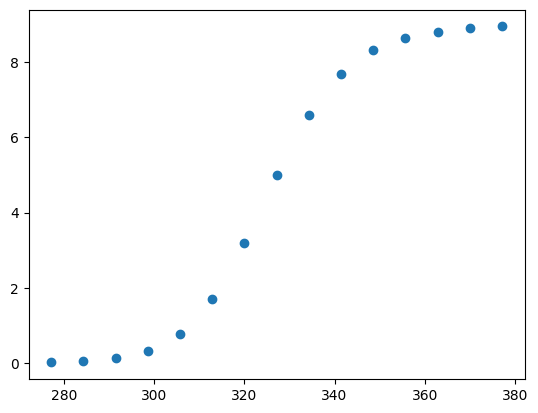

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

def sigmafunc(T, sigmaN, sigmaC, deltaH, TM, R=8.3144):
    Q=np.exp(-deltaH/R*(1/T-1/TM))
    return ((sigmaN+sigmaC*Q)/(1+Q))

mintemp = 4 # degrees C
maxtemp = 104
mintemp += 273.15 # conversion to Kelvin
maxtemp += 273.15
T = np.linspace(mintemp, maxtemp, 15)

sigmaN = 0 # arbitrary
sigmaC = 9 # arbitrary, but != sigmaN
deltaH = 100000 # Joules per mol, because if undeclared, R=8.3144 Joules per (Kelvin mol)
TM = 52 # degrees C
TM += 273.15 # conversion to Kelvin

sigma = sigmafunc(T, sigmaN, sigmaC, deltaH, TM)
plt.scatter(T,sigma)
plt.show()

## Actual Data & Sloping Baselines

Here is a scatter plot of actual data CD data at 217 nm for the PupB NTSD L74A mutant in the temperature range ~290 K to ~350 K:

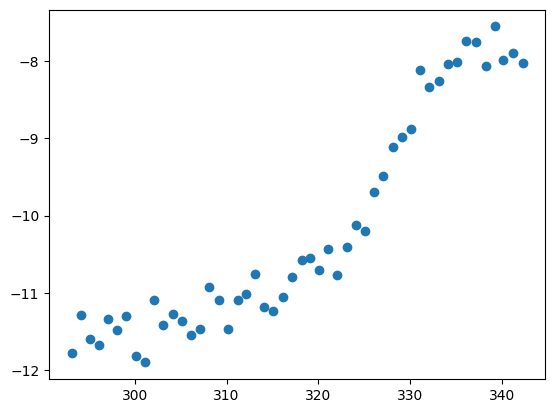

In [2]:
basedir = '/home/david/gh/intro_curve_fitting_python'
datadir = basedir+'/thermal_denaturation_data'
fn = datadir+'/PupB NTSD L74A 25 uM 217 nm F.csv'
os.chdir(datadir)

my_data = np.genfromtxt(fn, delimiter=',')

T = np.ravel(my_data[:,[0]])
y = np.ravel(my_data[:,[1]])
plt.scatter(T,y)
plt.show()

Although the lower temperature region shows a typical 'sloping' baseline,' let's begin by fitting these data to the equation in its current form, in which limiting <i>values</i> for $\sigma_N$ and $\sigma_N$ are specified, as opposed to limiting <i>lines</i>. 

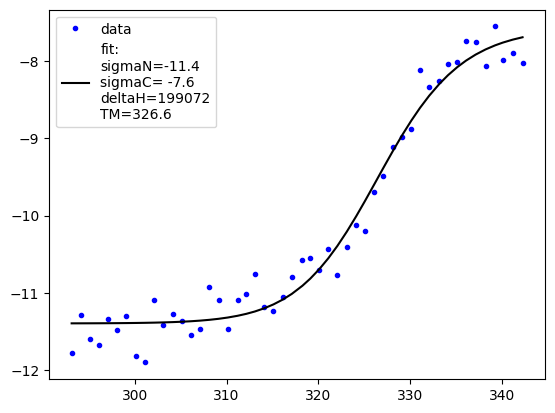

In [3]:
# sigmafunc(T, sigmaN, sigmaC, deltaH, TM, R=8.3144):
popt, pcov = curve_fit(sigmafunc, T, y, p0=[-11, -7.5, 28561, 329])

plt.plot(T, y, 'b.', label='data')
plt.plot(T, sigmafunc(T, *popt), 'k-',
        label='fit:\nsigmaN=%5.1f\nsigmaC=%5.1f\ndeltaH=%5.0f\nTM=%5.1f' % tuple(popt))
plt.legend()
plt.show()

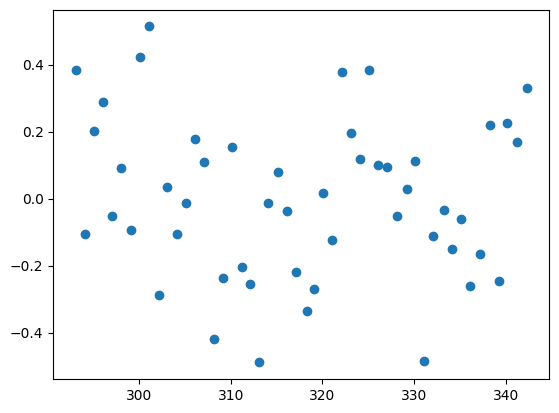

In [4]:
# calculate residuals:
sigmafuncresiduals = sigmafunc(T, *popt) - y

# residuals plot
plt.scatter(T, sigmafuncresiduals)
plt.show()

<font size="5">Computation of R-squared</font><br><br>
See, [here](https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit) for more. 
$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$
$$SS_{res}=\sum\limits_{i=1}^{n}(y_i-f(x_i))^2$$
$$SS_{tot}=\sum\limits_{i=1}^{n}(y_i-\bar{y})^2$$

In [5]:
sigmafuncssres = np.sum(np.square(sigmafuncresiduals))
sigmafuncsstot = np.sum(np.square(y-np.mean(y)))
Rsquared = 1-sigmafuncssres/sigmafuncsstot
print('Rsquared: %1.3f' % Rsquared)

Rsquared: 0.972


<font size="5">Addition of Sloping Baseline Corrections to the Fitting Function</font><br><br>
Now, let's extend the model to encode the equations of lines in place of the constants $\sigma_N$ and $\sigma_C$. These substitutions are simple:
$$\sigma_N\rightarrow m_1T+b_1$$
and
$$\sigma_C\rightarrow m_2T+b_2$$
and produce:

$$\sigma=\frac{m_1T+b_1+(m_2T+b_2)e^{-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})}}{1+e^{-\frac{\Delta H\degree}{R}(\frac{1}{T}-\frac{1}{T_M})}}$$<br><br>
Let's fit again using this function.

In [6]:
# define the function
def sigmaslopingbaselines(T, m1, b1, m2, b2, deltaH, TM, R=8.3144):
    line1 = m1*T+b1
    line2 = m2*T+b2
    Q=np.exp(-deltaH/R*(1/T-1/TM))
    return ((line1+line2*Q)/(1+Q))

Estimate parameters for low and high temperature lines:

In [7]:
# get the first 20 points for a low temp line
eks = T[:20]
why = y[:20]
def line(x, m, b):
    return m*x+b

ltlineparam, pcov = curve_fit(line, eks, why)
print('low temperature line:\n\tslope: %1.4f\tintercept: %2.2f' % tuple(ltlineparam))

# get the last 12 points for a high temp line
eks = T[-12:]
why = y[-12:]

htlineparam, pcov = curve_fit(line, eks, why)
print('high temperature line:\n\tslope: %1.4f\tintercept: %2.2f' % tuple(htlineparam))

low temperature line:
	slope: 0.0255	intercept: -19.11
high temperature line:
	slope: 0.0321	intercept: -18.78


Do the fit.

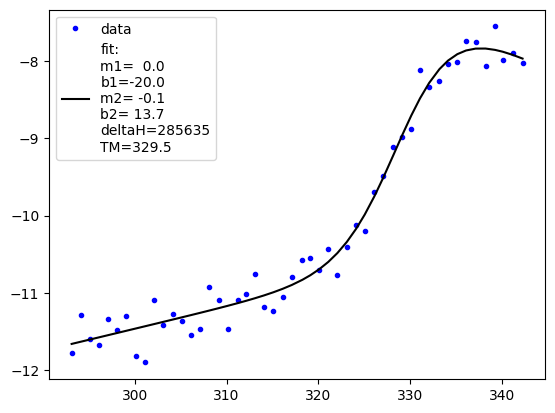

In [8]:
# def sigmaslopingbaselines(T, m1, b1, m2, b2, deltaH, TM, R=8.3144):
popt, pcov = curve_fit(sigmaslopingbaselines, T, y, p0=[ltlineparam[0], ltlineparam[1], htlineparam[0], htlineparam[1], 28561, 329])

plt.plot(T, y, 'b.', label='data')
plt.plot(T, sigmaslopingbaselines(T, *popt), 'k-',
        label='fit:\nm1=%5.1f\nb1=%5.1f\nm2=%5.1f\nb2=%5.1f\ndeltaH=%5.0f\nTM=%5.1f' % tuple(popt))
plt.legend()
plt.show()

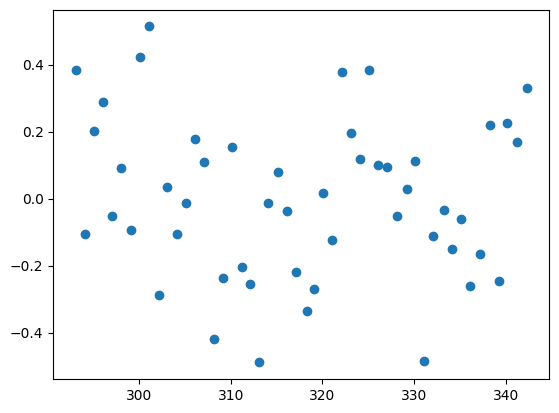

In [9]:
# calculate residuals:
sigmaslopingresiduals = sigmaslopingbaselines(T, *popt) - y

# residuals plot
plt.scatter(T, sigmafuncresiduals)
plt.show()

Compute R-squared:

In [10]:
sigmaslopingssres = np.sum(np.square(sigmaslopingresiduals))
sigmafuncsstot = np.sum(np.square(y-np.mean(y)))
Rsquared = 1-sigmaslopingssres/sigmafuncsstot
print('Rsquared: %1.3f' % Rsquared)

Rsquared: 0.981


That's a marginally better fit. Was it really worth adding the additional fittable parameters? Let's do a brief exercise with F-statistics.

In [11]:
# borrows heavily from:
# https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/

# populations to be tested
# sigmafuncresiduals
# sigmaslopingresiduals

# Calculate the sample variances
# variance1 = np.var(group1, ddof=1)
# variance2 = np.var(group2, ddof=1)
# rather, I wished to understand and implement the formula myself
var1 = 1/(-1+len(sigmafuncresiduals))*(np.sum((sigmafuncresiduals-np.mean(sigmafuncresiduals))**2))
var2 = 1/(-1+len(sigmaslopingresiduals))*(np.sum((sigmaslopingresiduals-np.mean(sigmaslopingresiduals))**2))

# Calculate the F-statistic
f_value = var1 / var2

# Calculate the degrees of freedom
df1 = len(sigmafuncresiduals) - 1 - 4 # 1 for the mean used in the computation of the variance; 4 fittable parameters in sigmafunc
df2 = len(sigmaslopingresiduals) - 1 - 6 # 1 for the mean used in the computation of the variance; 6 fittable parameters in sigmasloping

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print('Variance 1:', var1)
print('Variance 2:', var2)
print("F-statistic:", f_value)
print("p-value:", p_value)
print('\nInterpretation:\n\"p-value\" gives the value of the cumulative distribution function of the F\nvariable for the approrpiate pair of degrees of freedom. In this case, that\'s roughly 90%,\nor, the approximate level of confidence in the conclusion that the populations are different.')

Degree of freedom 1: 45
Degree of freedom 2: 43
Variance 1: 0.0567750215081515
Variance 2: 0.038176030687499404
F-statistic: 1.4871902732083215
p-value: 0.9032124846104912

Interpretation:
"p-value" gives the value of the cumulative distribution function of the F
variable for the approrpiate pair of degrees of freedom. In this case, that's roughly 90%,
or, the approximate level of confidence in the conclusion that the populations are different.
